In [2]:
import numpy as np



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import scipy.optimize as op


In [5]:
data = np.loadtxt('ex2data1.txt', delimiter=',')

In [6]:
# data, esta es toda la muestra que servira para entrenamiento.
X = data[:, 0:2]
y = data[:, 2]

In [7]:
# Se va a anhadir una columna de 1´s a la matrix de features X, esto tiene el sentido de un x0, cuando la frontera es lineal
X_p = np.append(np.ones([len(X),1]), X,1)

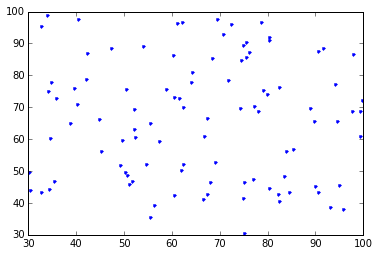

In [8]:
plt.plot(X[:, 0], X[:, 1], '.')

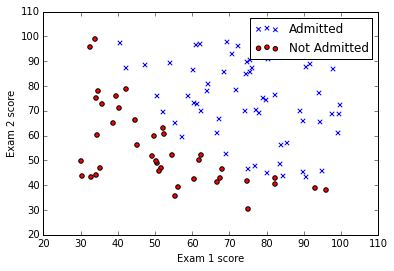

In [9]:
# Con scatter, para anhadir el la grafica que puntajes fueron o no admitidos.
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='x', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])

In [10]:
# numero de m - filas, n numero de colunmas 
m , n = X.shape
print m, n

100 2


In [11]:
def sigmoid(x):
    return 1 /(1 + np.exp(-x))
    

In [12]:
# Esta es segun la traduccion directa del matlab
def logRegresionCostFunction(theta, X, y):
    m = np.size(y)
    J = -(np.sum(y.transpose() * np.log(sigmoid(np.dot(X, theta))) + (1 - y).transpose()
                 * np.log(1 - sigmoid(np.dot(X, theta)))))/m 
    # calcular el gradiente
    z = sigmoid(np.dot(X, theta)) - y
    grad = np.dot(X.transpose(), z)/m
    return J , grad

In [13]:
# Esta funcion de costo esta perfecta y los vectores entran directamente. No hay
# necesidad de vector colunma para theta
def logRegCostFunc(theta, x, y):
    m = np.size(y)
    #print m, n
    #theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    J = -(np.sum(y.transpose() * np.log(sigmoid(x.dot(theta))) + (1 - y).transpose()
                 * np.log(1 - sigmoid(x.dot(theta)))))/m 
 
    return J

In [14]:
# Esta funcion de incluye el factor de regularizacion.  No hay
# necesidad de vector colunma para theta.
def logRegCostFuncReg(theta, x, y):
    thetaR = theta[1:] # Para la regularizacion se debe retirar theta0
    def cuadra(x):
        return x ** 2 
    cuadradosF = map(lambda x: cuadra(x), thetaR)
    lam = 3 # lambda se incluye al interior, porque no sé como llamarlo desde el metodo de optimizacion
    m = np.size(y)
    y = y.reshape((m,1))
    thetaR = theta[1:]
    J = -(np.sum(y.transpose() * np.log(sigmoid(x.dot(theta))) + (1 - y).transpose()
                     * np.log(1 - sigmoid(x.dot(theta)))))/m + (lam * (np.sum(cuadradosF)))/(2.0 * m)
 
    return J

In [15]:
#test unitario
px = np.array([[1, 8, 1, 6] ,[1, 3, 5, 7], [1, 4, 9, 2]])
print px
py = np.array([1, 0, 1])
print py
pt = np.array([-2, -1, 1, 2])
print pt

pj = logRegCostFuncReg(pt, px, py,)
print pj

[[1 8 1 6]
 [1 3 5 7]
 [1 4 9 2]]
[1 0 1]
[-2 -1  1  2]
7.68316654981


In [16]:
def gradient(theta,x,y):
    m, n = x.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m,1))
    sigmoid_x_theta = sigmoid(x.dot(theta))
    grad = ((x.T).dot(sigmoid_x_theta-y))/m
    return grad.flatten();

In [17]:
# aun no me funciona ......
def gradientReg(theta,x,y):
    l = 3.0
    m, n = x.shape
    thetaR = theta[1:] # Para la regularizacion se debe retirar theta0
    theta = theta.reshape((n, 1))
    y = y.reshape((m,1))
    sigmoid_x_theta = sigmoid(x.dot(theta))
    grad = ((x.T).dot(sigmoid_x_theta-y))/m
    return grad.flatten();

In [20]:
#test unitario
px = np.array([[1, 8, 1, 6] ,[1, 3, 5, 7], [1, 4, 9, 2]])
print px
py = np.array([1, 0, 1])
print py
pt = np.array([-2, -1, 1, 2])
print pt

pj = logRegCostFuncReg(pt, px, py,)
print pj
#grad_j = cost_function_reg(pt, px, py, 3)
#print grad_j

[[1 8 1 6]
 [1 3 5 7]
 [1 4 9 2]]
[1 0 1]
[-2 -1  1  2]
7.68316654981


In [21]:
# test unitario
theta1 = np.array([-2, -1, 1, 2])
X1 = np.array([[1, 8, 1, 6], [1, 3, 5, 7], [1, 4, 9, 2]])
y1 = np.array([1, 0, 1])
print theta1, X1, y1
m = np.size(y1)


J = logRegCostFunc(theta1, X1, y1)
print 'Con logRegCostFunc', J

grad = gradient(theta1, X1, y1)
print grad

[-2 -1  1  2] [[1 8 1 6]
 [1 3 5 7]
 [1 4 9 2]] [1 0 1]
Con logRegCostFunc 4.68316654981
[ 0.31722075  0.87231544  1.6481235   2.23787228]


In [22]:
# Este metodo de optimizacion de la libreria scipy utiliza el metodo de Newton para encontrar el minimo de la funcion de 
# costo. Se le debe entregar la funcion de costo (fun) y la funcion gradiente(jac). 

m , n = X_p.shape
initial_theta = np.zeros(n)
Result = op.minimize(fun = logRegCostFunc, x0 = initial_theta, args = (X_p, y), method = 'TNC', jac = gradient)
optimal_theta = Result.x
print Result
print optimal_theta

  status: 1
 success: True
    nfev: 51
     fun: 0.20357141274486726
       x: array([-25.8738918 ,   0.21193959,   0.20722848])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
     jac: array([-0.00020609,  0.00014644, -0.00035043])
     nit: 19
[-25.8738918    0.21193959   0.20722848]


In [23]:
def predict(theta, x):
    p = sigmoid(np.dot(x, theta.transpose()))
    #print p
    return p > 0.5

In [24]:
#test unitario.
p1 = predict(optimal_theta, np.array([1, 93, 38]))
print "probabilidad admission:", p1

probabilidad admission: True


In [25]:
# yr es el vector de admisiones calculado
m, n = X_p.shape
yr = np.zeros(m)
yr = predict(optimal_theta, X_p)
print yr


[False False False  True  True False  True False  True  True  True False
  True  True False  True False False  True  True False  True False False
  True  True  True  True False False  True  True False False False False
  True  True False False  True False  True  True False False  True  True
  True  True  True  True  True False False False  True  True  True  True
  True False False False False False  True False  True  True False  True
  True  True  True  True  True  True False  True  True  True  True False
  True  True False  True  True False  True  True False  True  True  True
  True  True False  True]


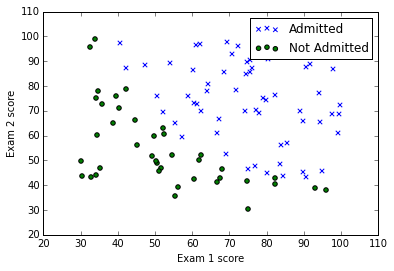

In [26]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='x', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='g')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])

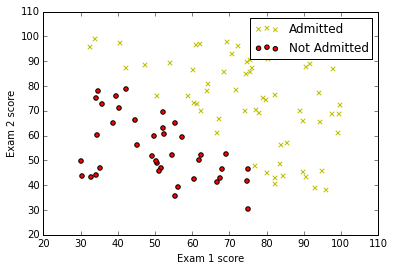

In [28]:
pos = np.where(yr == 1)
neg = np.where(yr == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='x', c='y')
plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='r')
#plt.plot(X[:, 0], X[:, 1], '.')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])


In [32]:
training_error = sum(yr != y)/float(m)
print training_error

0.11


# Segunda Parte - Uso de una hipotesis polinomial - map features

Este problema involucra un cambio en la caracteristicas ya que la frontera de decision, (linear decision boundary) no es lineal para este caso. La frontera pareceria mas bien un polinomio de grado superior.

Se tienen los resultados de los 2 pruebas que deben pasar un lote de microchips, y usted debe determinar
partiendo del resultado de los test si cada uno de los microchips sera aceptado o rechazado. 
Para ayudarlo a realizar el modelo se tiene un dataset anterior en donde un lote del mismo tipo de microchips
se le corrio la misma prueba, con los resultados de "aceptado" y "rechazado".
dataset para entrenamiento: 118 
1 acceptadp
0 rechazado


In [33]:
data = np.loadtxt('ex2data2.txt', delimiter=',')

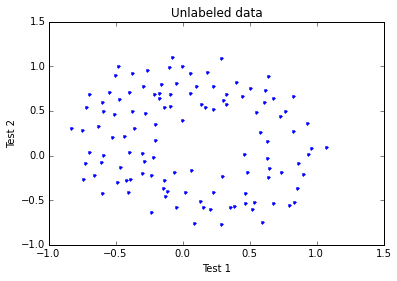

In [34]:
# data, esta es toda la muestra que servira para entrenamiento.
X2 = data[:, 0:2]
y2 = data[:, 2]
#m, n = X2.shape
#print m, n

plt.plot(X2[:,0],X2[:,1], '.')
plt.title('Unlabeled data')
plt.xlabel('Test 1')
plt.ylabel('Test 2')

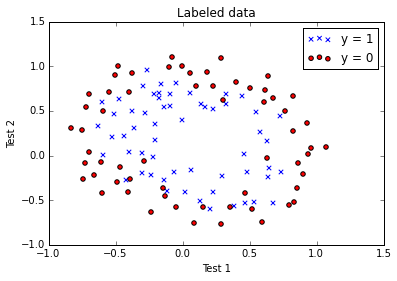

In [136]:
# con scatter

pos = np.where(y2 == 1)
neg = np.where(y2 == 0)
plt.scatter(X2[pos, 0], X2[pos, 1], marker='x', c='b')
plt.scatter(X2[neg, 0], X2[neg, 1], marker='o', c='r')
plt.title('Labeled data')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['y = 1', 'y = 0'])

In [137]:
def mapFeature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out


In [140]:
# Se pasara de una matrix de caracteristicas (X2) de 2 a 28 caracteristicas
new_X = mapFeature(X2[:,0],X2[:,1]) # new_X es una matrix de 28 caracteristicas
m,n = new_X.shape
print m, n, y2.shape

 118 28 (118L,)


In [171]:
initial_theta2 = np.zeros(n)
Result = op.minimize(fun = logRegCostFunc, x0 = initial_theta2, args = (new_X, y2), method = 'TNC', jac = gradient)
optimal_theta2 = Result.x
#print Result
#print 'theta optimo: ', optimal_theta2

In [172]:
# yr es el vector de admisiones calculado
m, n = new_X.shape
y2r = np.zeros(m)
y2r = predict(optimal_theta2, new_X)
#print y2r

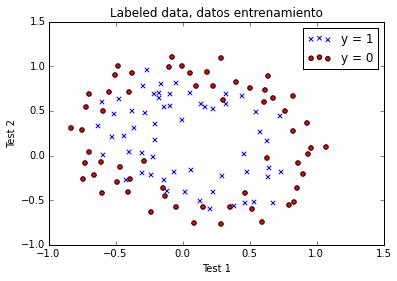

In [143]:
# con scatter

pos = np.where(y2 == 1)
neg = np.where(y2 == 0)
plt.scatter(X2[pos, 0], X2[pos, 1], marker='x', c='b')
plt.scatter(X2[neg, 0], X2[neg, 1], marker='o', c='r')
plt.title('Labeled data, datos entrenamiento')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['y = 1', 'y = 0'])

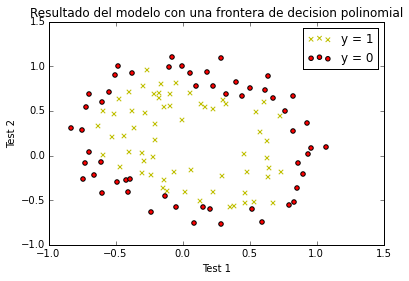

In [144]:
# con scatter

pos = np.where(y2r == 1)
neg = np.where(y2r == 0)
plt.scatter(X2[pos, 0], X2[pos, 1], marker='x', c='y')
plt.scatter(X2[neg, 0], X2[neg, 1], marker='o', c='r')
plt.title('Resultado del modelo con una frontera de decision polinomial')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['y = 1', 'y = 0'])

# Tercera parte

En el caso de los microships es claro que existe overfitting. Se debe entonces adicionar un parametro de regularizacion (tambien llamada una penalización) a la funcion de costo, para mantener los elementos del vector theta pequenos. Esta técnica se llama tambien Ridge Regresion.


In [45]:
#Pregunta como se hace una ridge regresion con clasificacion????

In [163]:
import graphlab

A newer version of GraphLab Create (v1.8.2) is available! Your current version is v1.7.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [169]:
#usemos la libreria GRAPHLAB
data_gl = graphlab.SFrame.read_csv('ex2data_gl.txt')

PROGRESS: Finished parsing file C:\Users\margrami\Regression\ex2data_gl.txt
PROGRESS: Parsing completed. Parsed 100 lines in 0.023001 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[float,float,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file C:\Users\margrami\Regression\ex2data_gl.txt
PROGRESS: Parsing completed. Parsed 118 lines in 0.012001 secs.


In [170]:
data_gl.head()

text1,text2,Pass
0.051267,0.69956,1
-0.092742,0.68494,1
-0.21371,0.69225,1
-0.375,0.50219,1
-0.51325,0.46564,1
-0.52477,0.2098,1
-0.39804,0.034357,1
-0.30588,-0.19225,1
0.016705,-0.40424,1
0.13191,-0.51389,1


In [173]:
train_data,test_data = data_gl.random_split(.8, seed=0) 

In [ ]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
        # and set poly_sframe['power_1'] equal to the passed feature
        poly_sframe['power_1'] = feature
        # first check if degree > 1
        if degree > 1:
            # then loop over the remaining degrees:
            # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
            for power in range(2, degree+1): 
                # first we'll give the column a name:
                name = 'power_' + str(power)
                # then assign poly_sframe[name] to the appropriate power of feature
                poly_sframe[str(name)] = feature.apply(lambda x: x**power)
        return poly_sframe
    
def mapFeature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out


In [ ]:
def polynomial_sframe(feature, degree):
    poly_sframe = graphlab.SFrame()
    poly_sframe['power1'] = feature
    if degree > 1:
        for power in range(2, degree + 1):
            name = 'power_' + str

In [174]:
logistic_model = graphlab.logistic_classifier.create(train_data,
                                                     target='Pass',
                                                     features=['text1', 'text2'],
                                                     validation_set=test_data)

PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 102
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 2
PROGRESS: Number of unpacked features : 2
PROGRESS: Number of coefficients    : 3
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 2        | 1.003058     | 0.539216          | 0.437500            |
PROGRESS: | 2         | 3        | 1.005058     | 0.539216          | 0.437500            |
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: SUCCESS: Optimal solution foun

In [177]:
logistic_model.coefficients

name,index,class,value
(intercept),None,1,-0.0293023971575
text1,None,1,-0.399966886568
text2,None,1,0.0479740691362


# Cuarta parte - Evaluar rendimiento
Assessing Performance o evaluar rendimiento